In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
data=pd.read_csv(r"C:\Users\goura\Downloads\CWML\Advertising.csv")

In [3]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [6]:
data.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'radio'}>,
        <Axes: title={'center': 'newspaper'}>],
       [<Axes: title={'center': 'sales'}>, <Axes: >]], dtype=object)

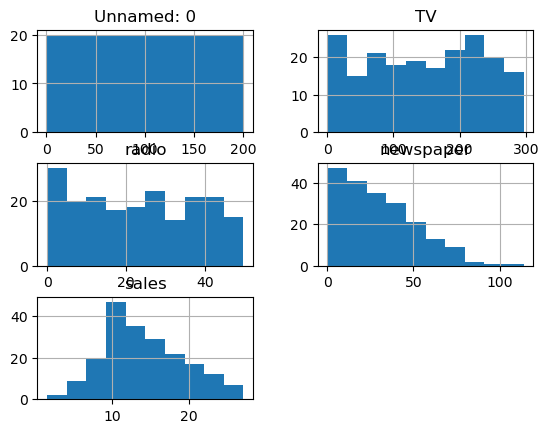

In [7]:
data.hist()

In [10]:
data.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [17]:
X_IV=data.iloc[:,1:4]
y_DV=data["sales"]

In [16]:
X_IV

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [18]:
y_DV

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [19]:
from statsmodels.stats.api import linear_rainbow,het_goldfeldquandt

In [21]:
myLrModel=sm.OLS(y_DV,X_IV).fit()


In [22]:
sats=linear_rainbow(myLrModel)

In [23]:
sats

(0.9011628312360566, 0.6971094281960714)

In [24]:
if sats[0]>.05:
    print("the p value is",round(sats[1],4),">0.05 so reject the null")
else:
     print("the p value is",round(sats[1],4),"<0.05 so accept the null")

the p value is 0.6971 >0.05 so reject the null


In [25]:
trainer=LinearRegression()

In [28]:
lr=trainer.fit(X_IV,y_DV)

In [29]:
lr.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [30]:
lr.intercept_

2.938889369459412

In [31]:
y_pred=lr.predict(X_IV)

In [32]:
y_pred

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

In [33]:
mean_squared_error(y_pred,y_DV)

2.784126314510936

In [34]:
r2_score(y_DV,y_pred)

0.8972106381789522

In [60]:
input=(38.2,3.7,13.2)

TypeError: 'tuple' object is not callable

In [55]:
test=np.asarray(input)

In [56]:
test_reshape=test.reshape(1,-1)

In [57]:
t_pred=lr.predict(test_reshape)

C:\Users\goura\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [58]:
t_pred

array([5.37034248])

In [59]:
print(f"The sales amount for above input={t_pred[0]}")

The sales amount for above input=5.370342484466784
